#Loan Prediction
##Introduction
Purpose of the Document This document serves as a comprehensive guide for understanding the implementation of a loan approval prediction system using machine learning techniques. It provides insights into the steps involved in developing, deploying, and maintaining the predictive model.

#Scope
The scope of this document encompasses the entire lifecycle of the loan approval prediction project, from data collection and preprocessing to model deployment and ongoing maintenance.

#Audience
This document is intended for data scientists, machine learning engineers, developers, and stakeholders involved in building and using the loan approval prediction system.

#Problem Statement
Background The loan approval prediction system aims to automate the loan approval process for a financial institution. Traditional loan approval processes are time-consuming and prone to human biases. This system utilizes historical data to predict whether a loan application should be approved or denied based on various factors.

#Objective
The primary objective is to develop an accurate machine learning model that predicts loan approval outcomes with high precision and recall.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("Training Dataset.csv")

In [28]:
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [29]:
obj = (data.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 8


In [30]:
print(data.index.size)  #printing the number of rows in the datarframe

614


In [31]:
print(data.columns) #printing the name of the columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [32]:
print(len(data.columns)) #printing the number of the columns

13


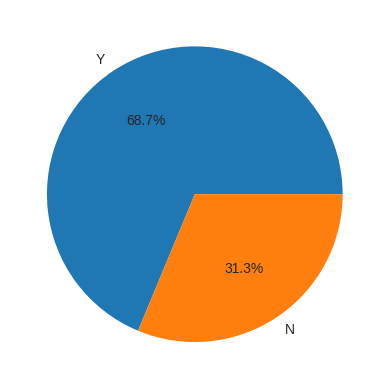

In [33]:
temp = data['Loan_Status'].value_counts()
plt.pie(temp.values,
		labels=temp.index,
		autopct='%1.1f%%')
plt.show()

<ipython-input-34-fca6f5d21178>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, i+1)
<ipython-input-34-fca6f5d21178>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data[col])
<ipython-input-34-fca6f5d21178>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the

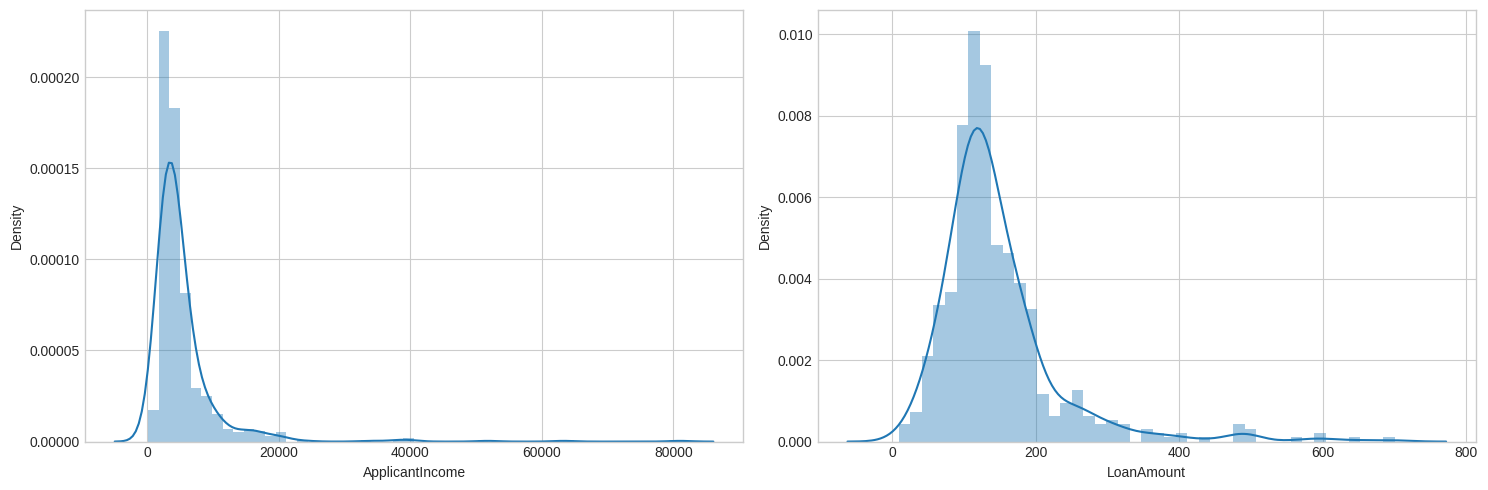

In [34]:
import seaborn as sb
plt.subplots(figsize=(15, 5))
for i, col in enumerate(['ApplicantIncome', 'LoanAmount']):
	plt.subplot(1, 2, i+1)
	sb.distplot(data[col])
plt.tight_layout()
plt.show()

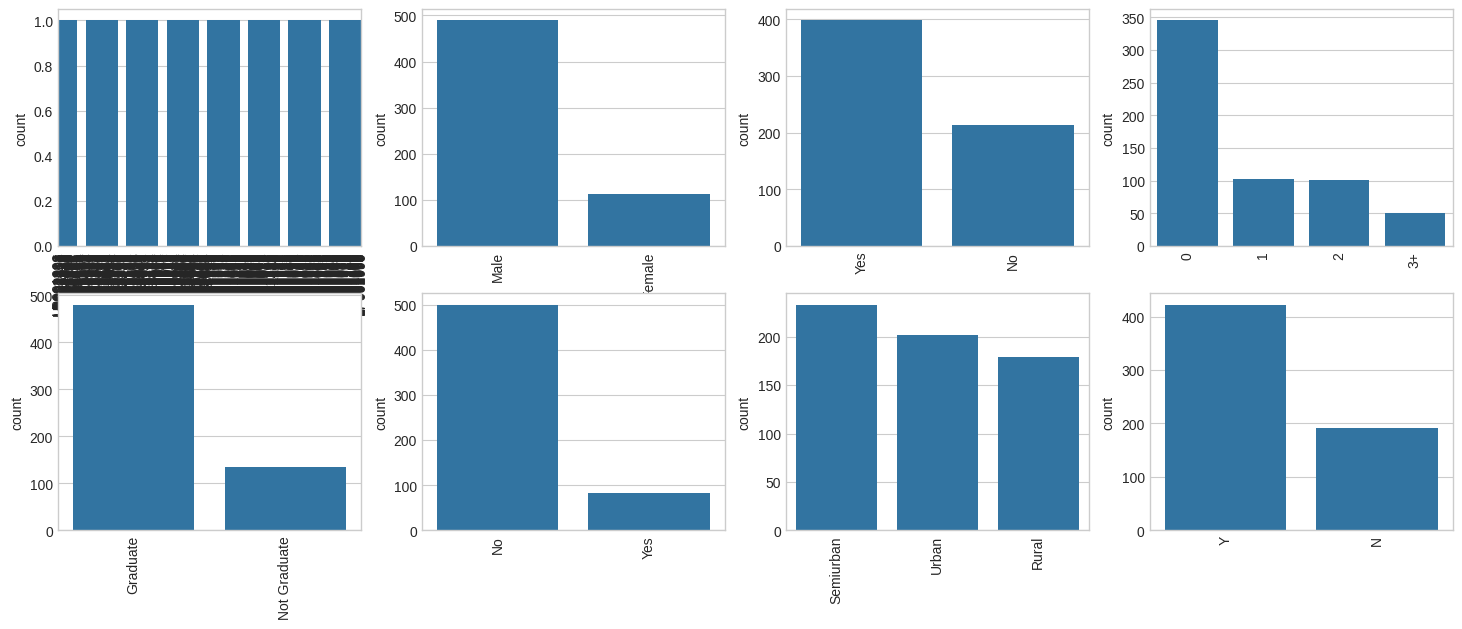

In [41]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize=(18,40))
index = 1

for col in object_cols:
  y = data[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index), y=y)
  index +=1

In [42]:
from sklearn import preprocessing

# label_encoder object knows how
# to understand word labels.
label_encoder = preprocessing.LabelEncoder()
obj = (data.dtypes == 'object')
for col in list(obj[obj].index):
  data[col] = label_encoder.fit_transform(data[col])

In [46]:
for col in data.columns:
  data[col] = data[col].fillna(data[col].mean())

data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [49]:
from sklearn.model_selection import train_test_split

X = data.drop(['Loan_Status'],axis=1)
Y = data['Loan_Status']
X.shape,Y.shape

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
													test_size=0.2,
													random_state=1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((491, 12), (123, 12), (491,), (123,))

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators = 7,
							criterion = 'entropy',
							random_state =7)
svc = SVC()
lc = LogisticRegression()

# making predictions on the training set
for clf in (rfc, knn, svc,lc):
	clf.fit(X_train, Y_train)
	Y_pred = clf.predict(X_train)
	print("Accuracy score of ",
		clf.__class__.__name__,
		"=",100*metrics.accuracy_score(Y_train,
										Y_pred))


Accuracy score of  RandomForestClassifier = 97.14867617107943
Accuracy score of  KNeighborsClassifier = 78.00407331975559
Accuracy score of  SVC = 69.65376782077392
Accuracy score of  LogisticRegression = 81.26272912423626


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
# making predictions on the testing set
for clf in (rfc, knn, svc,lc):
	clf.fit(X_train, Y_train)
	Y_pred = clf.predict(X_test)
	print("Accuracy score of ",
		clf.__class__.__name__,"=",
		100*metrics.accuracy_score(Y_test,
									Y_pred))


Accuracy score of  RandomForestClassifier = 77.23577235772358
Accuracy score of  KNeighborsClassifier = 59.34959349593496
Accuracy score of  SVC = 67.47967479674797
Accuracy score of  LogisticRegression = 79.67479674796748


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [53]:
pred=rfc.predict( X_test)
print(accuracy_score( Y_test,pred))
print(confusion_matrix( Y_test,pred))
print(classification_report( Y_test,pred))

0.7723577235772358
[[17 22]
 [ 6 78]]
              precision    recall  f1-score   support

           0       0.74      0.44      0.55        39
           1       0.78      0.93      0.85        84

    accuracy                           0.77       123
   macro avg       0.76      0.68      0.70       123
weighted avg       0.77      0.77      0.75       123



In [54]:
df_output=pd.DataFrame()

In [55]:
outp=rfc.predict(X_test).astype(int)
outp
df_output['Loan_Status']=outp
df_output.head(5)

,Loan_Status
0,1
1,1
2,1
3,1
4,1


In [63]:
train=pd.read_csv('Training Dataset.csv')
from sklearn.impute import SimpleImputer
x=train.iloc[:,:-1]
x.drop(columns=['Loan_ID'],inplace=True)
y=train.loc[:,'Loan_Status']
y=y.map({'Y':1,'N':0})


obj_col = x.select_dtypes(include=['object']).columns
int_col = x.select_dtypes(include=['int64','float64']).columns

from sklearn.impute import SimpleImputer

imp1 = SimpleImputer(strategy='mean')
imp1.fit(x[int_col])
x[int_col] = imp1.transform(x[int_col])

imp2 = SimpleImputer(strategy='most_frequent')
imp2.fit(x[obj_col])
x[obj_col] = imp2.transform(x[obj_col])


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in obj_col:
    x[col] = le.fit_transform(x[col])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=scaler.fit_transform(x)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x=scaler.transform(x)

In [67]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    subsample=0.8,
    n_estimators=100,
    max_depth=8,
    learning_rate=0.01,
    colsample_bytree=1.0
)
xgb_clf.fit(x,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [70]:
test=pd.read_csv('Test Dataset.csv')
temp=test[['Loan_ID']]
test.drop(columns=['Loan_ID'],inplace=True)

imp1 = SimpleImputer(strategy='mean')
imp1.fit(test[int_col])
test[int_col] = imp1.transform(test[int_col])

imp2 = SimpleImputer(strategy='most_frequent')
imp2.fit(test[obj_col])
test[obj_col] = imp2.transform(test[obj_col])

for col in obj_col:
    test[col] = le.fit_transform(test[col])

test=scaler.fit_transform(test)
#y_pred=xgb_best.predict(x)
#y_pred=xgb_clf.predict(test)


In [73]:
y_pred=xgb_clf.predict(test)
temp['Loan_Status']=y_pred
temp['Loan_Status'] = temp['Loan_Status'].map({1: 'Y', 0: 'N'})

In [74]:
temp.to_csv('Submission.csv')

In [75]:
d=pd.read_csv('Submission.csv')

In [76]:
d


,Unnamed: 0,Loan_ID,Loan_Status
0,0,LP001015,Y
1,1,LP001022,Y
2,2,LP001031,Y
3,3,LP001035,N
4,4,LP001051,Y
...,...,...,...
362,362,LP002971,Y
363,363,LP002975,Y
364,364,LP002980,N
365,365,LP002986,Y
